In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})


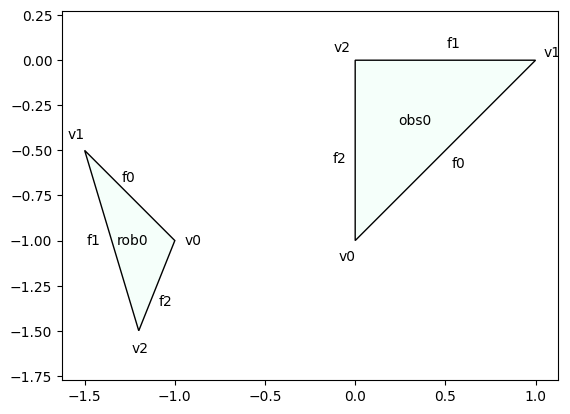

In [2]:
# 2 items
obs_vertices = [
    np.array([[0, 0], [1, 0], [0, -1]])
]
obj_vertices = [
]
rob_vertices = [
    np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
]
source_obj_pos = []
source_rob_pos = [[-1, -1]]
target_obj_pos = []
target_rob_pos = [[-1, 1]]


# # 2 movable items
# obs_vertices = []
# obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
# rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
# source_obj_pos = [[1, 1]]
# source_rob_pos = [[-1, -1]]
# target_obj_pos = [[-1, -1]]
# target_rob_pos = [[1, 1]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
n_pos_per_set = 10
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
contact_graph = ContactGraph(
    obs, objs, robs, source_obj_pos, source_rob_pos, target_obj_pos, target_rob_pos
)

print(contact_graph.params)

vars_pos shape (1, 2, 10)
[[[Variable('rob0_pos(0, 0)', Continuous)
   Variable('rob0_pos(0, 1)', Continuous)
   Variable('rob0_pos(0, 2)', Continuous)
   Variable('rob0_pos(0, 3)', Continuous)
   Variable('rob0_pos(0, 4)', Continuous)
   Variable('rob0_pos(0, 5)', Continuous)
   Variable('rob0_pos(0, 6)', Continuous)
   Variable('rob0_pos(0, 7)', Continuous)
   Variable('rob0_pos(0, 8)', Continuous)
   Variable('rob0_pos(0, 9)', Continuous)]
  [Variable('rob0_pos(1, 0)', Continuous)
   Variable('rob0_pos(1, 1)', Continuous)
   Variable('rob0_pos(1, 2)', Continuous)
   Variable('rob0_pos(1, 3)', Continuous)
   Variable('rob0_pos(1, 4)', Continuous)
   Variable('rob0_pos(1, 5)', Continuous)
   Variable('rob0_pos(1, 6)', Continuous)
   Variable('rob0_pos(1, 7)', Continuous)
   Variable('rob0_pos(1, 8)', Continuous)
   Variable('rob0_pos(1, 9)', Continuous)]]]
vars_all shape (20,)
[Variable('rob0_pos(0, 0)', Continuous)
 Variable('rob0_pos(0, 1)', Continuous)
 Variable('rob0_pos(0, 2)', C

100%|██████████| 1/1 [00:00<00:00, 35.82it/s]


Each body pair has on average 9.0 modes
Generating contact sets for 9 sets...


100%|██████████| 9/9 [00:00<00:00, 1782.28it/s]


Pruning empty sets...


100%|██████████| 9/9 [00:00<00:00, 120.53it/s]

9 sets remain after removing 0 empty sets
edge_costs_position_continuity_norm exprs: [<Expression "(100 * (u_rob0_pos(0, 9) - v_rob0_pos(0, 0)))">
 <Expression "(100 * (u_rob0_pos(1, 9) - v_rob0_pos(1, 0)))">]
edge_constraint_position_continuity_linearconstraint exprs: [<Expression "(u_rob0_pos(0, 9) - v_rob0_pos(0, 0))">
 <Expression "(u_rob0_pos(1, 9) - v_rob0_pos(1, 0))">]
A: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]]
Generating edges...(parallel)



100%|██████████| 55/55 [00:00<00:00, 424.50it/s]

18 edges generated
GraphParams(dim=20, n_vertices=11, n_edges=18, source=[[-1, -1]], target=[[-1, 1]], workspace=None, default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x7f8b909519b0>], vertex_constraints=[], edge_costs=[<pydrake.solvers.LinearCost object at 0x7f8b9094f570>, <pydrake.solvers.L2NormCost object at 0x7f8b90951a70>], edge_constraints=[<pydrake.solvers.LinearConstraint object at 0x7f8b909511f0>]))


In [4]:
sol = contact_graph.solve()
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

Post solve hook called...
('s', "('NC:obs0_f2-rob0_v0',)", 't')


In [5]:
contact_sol = contact_graph.contact_spp_sol
# print(contact_sol)

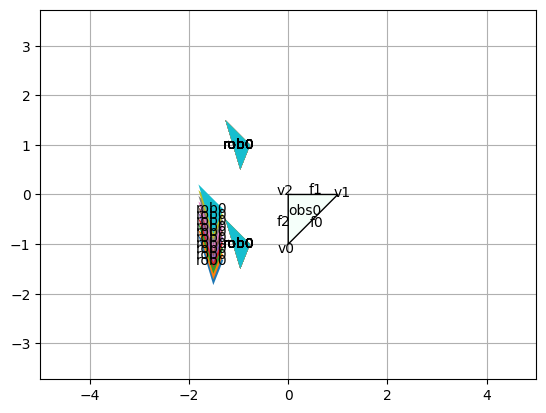

In [6]:
def plot_path(sol):
    n_time_steps = sol.object_pos_trajectories.shape[2]
    plt.figure()
    for j in range(n_time_steps):
        # Plot object trajectories
        for i in range(sol.object_pos_trajectories.shape[0]):
            contact_graph.objects[i].plot_at_position(
                sol.object_pos_trajectories[i, :, j]
            )
        for i in range(sol.robot_pos_trajectories.shape[0]):
            contact_graph.robots[i].plot_at_position(
                sol.robot_pos_trajectories[i, :, j]
            )
    for obs in contact_graph.obstacles:
        obs.plot()
    # Show the plot
    plt.axis("equal")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    plt.grid()
    plt.show()


plot_path(contact_sol)

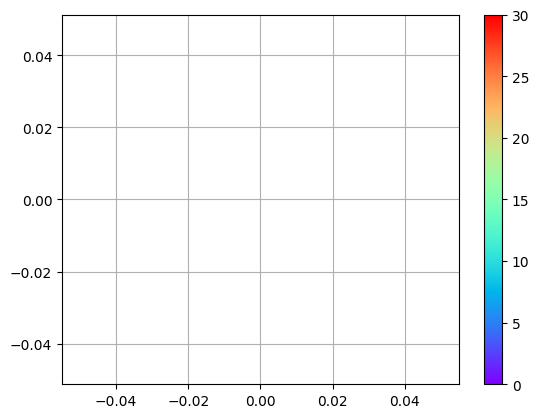

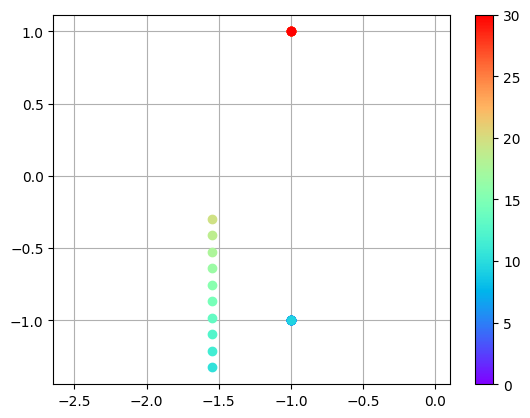

In [7]:
contact_graph.plot_path()

In [8]:
for i in range(contact_sol.robot_pos_trajectories.shape[2]):
    if i % n_pos_per_set == 0:
        print("-----")
        print(
            "robot",
            contact_sol.robot_pos_trajectories[0, :, i],
        )
        if contact_sol.object_pos_trajectories.size > 0:
            print(
                "object",
                contact_sol.object_pos_trajectories[0, :, i],
            )


    # print(f"last of set: {contact_sol.object_pos_trajectories[0, :, (i*n_pos_per_set)-1]}")
    # print(f"first of set: {contact_sol.object_pos_trajectories[0, :, i*n_pos_per_set]}")

-----
robot [-1. -1.]
-----
robot [-1.54367718 -1.32662156]
-----
robot [-1.  1.]


In [9]:
a = np.array([1.,1.])
b = np.array([0.78339263, 3.35039319])
# print(np.linalg.norm(b-a))
a-b

array([ 0.21660737, -2.35039319])

In [10]:
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

print(ambient_path)
new_ambient_path = np.array([[1.000, 1.000, 1.000, 1.000, -1.000, -1.000, -1.000, -1.000],
                             [1.000, -0.325, 1.000, 2.487, -1.000, -0.240, -1.000, -0.288],
                             [-0.325, -1.000, 2.487, -1.000, -0.240, 1.000, -0.288, 1.000],
                             [-1.000, -1.000, -1.000, -1.000, 1.000, 1.000, 1.000, 1.000]])
ambient_path = np.array(ambient_path)
# ambient_path = new_ambient_path

('s', "('NC:obs0_f2-rob0_v0',)", 't')
(array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.]), array([-1.54367718, -1.54368256, -1.54368526, -1.54368532, -1.54368268,
       -1.54367719, -1.54366853, -1.54365617, -1.54363896, -1.54361352,
       -1.32662156, -1.2120955 , -1.09756944, -0.98304338, -0.86851732,
       -0.75399126, -0.6394652 , -0.52493915, -0.41041309, -0.29588703]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.]))


In [11]:

contact_graph.cc_factory.uv_vars_all
for i in range(ambient_path.shape[0] - 1):
    for constraint in contact_graph._default_costs_constraints.edge_constraints:
        uv_vals_flattened = np.concatenate(ambient_path[i : i + 2])
        issatisfied = constraint.CheckSatisfied(uv_vals_flattened)
        print(f"constraint is satisfied: {issatisfied}")
    # print(f"vertex: {vertex_names[i]}")
    # print(f"vertex pos: {ambient_path[i]}")
    # print(f"next vertex: {vertex_names[i+1]}")
    # print(f"next vertex pos: {ambient_path[i+1]}")
    print("-------------------")


constraint is satisfied: False
-------------------
constraint is satisfied: False
-------------------


('IC:obs0_f0-rob0_v1',)


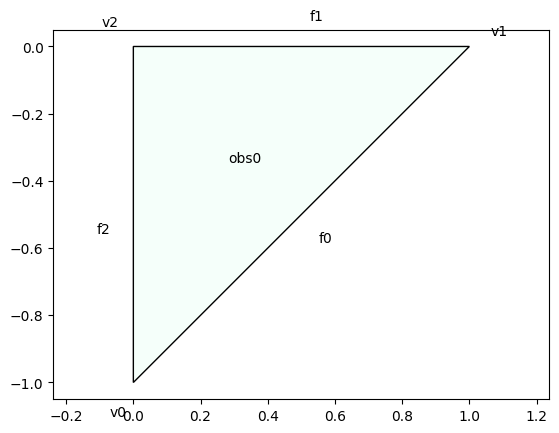

('IC:obs0_f1-rob0_v2',)
rob_pos: [0.16666955 0.50001547]


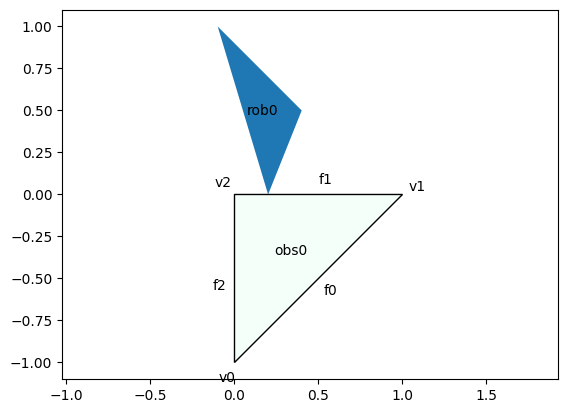

('IC:obs0_f2-rob0_v0',)
rob_pos: [-0.23333045 -0.79998453]


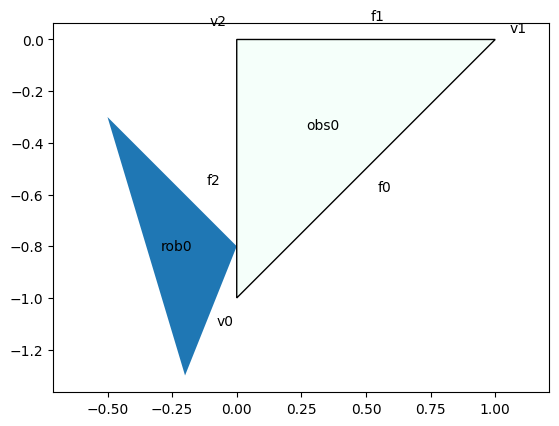

('IC:obs0_v0-rob0_f0',)
rob_pos: [-0.13333045 -1.09998453]


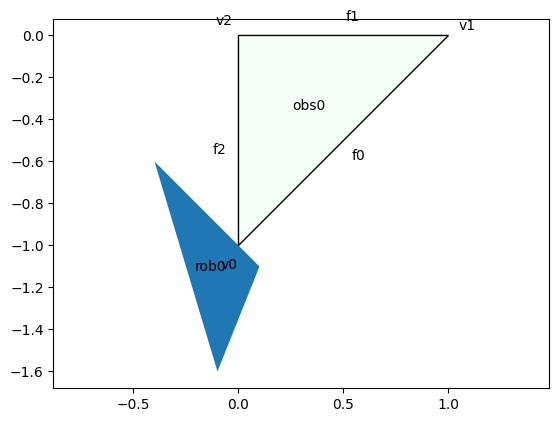

('IC:obs0_v1-rob0_f1',)


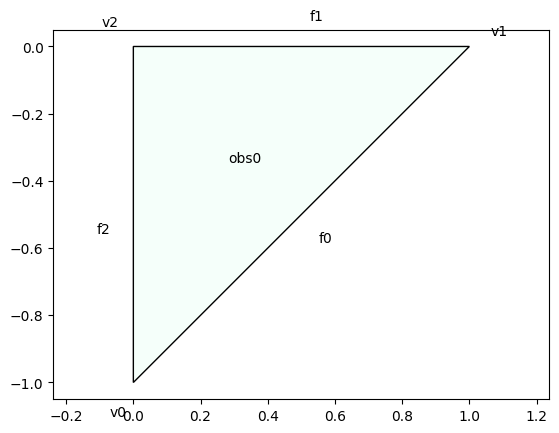

('IC:obs0_v2-rob0_f2',)
rob_pos: [-0.07333045  0.40001547]


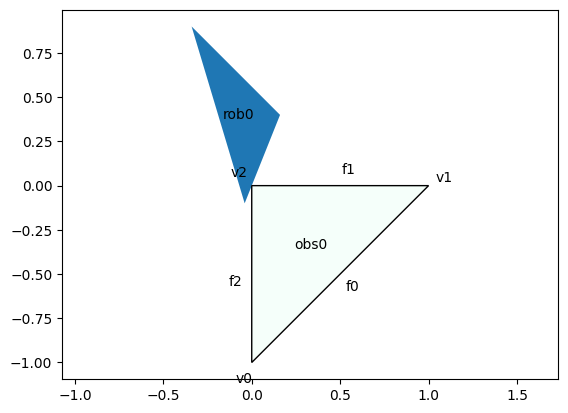

('NC:obs0_f0-rob0_v1',)


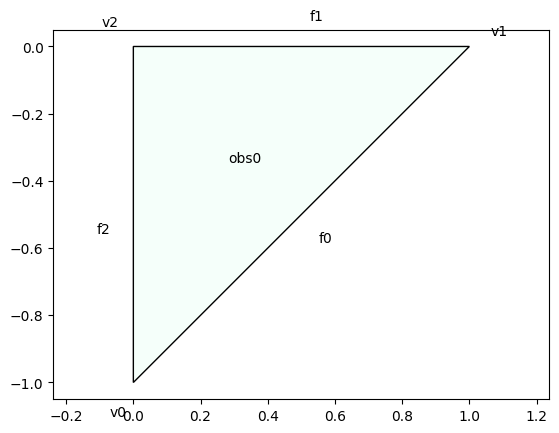

('NC:obs0_f1-rob0_v2',)


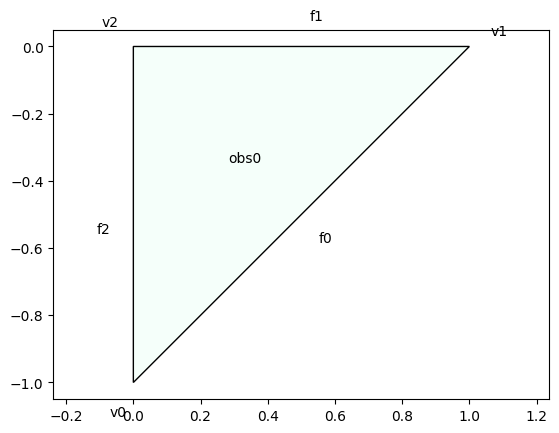

('NC:obs0_f2-rob0_v0',)


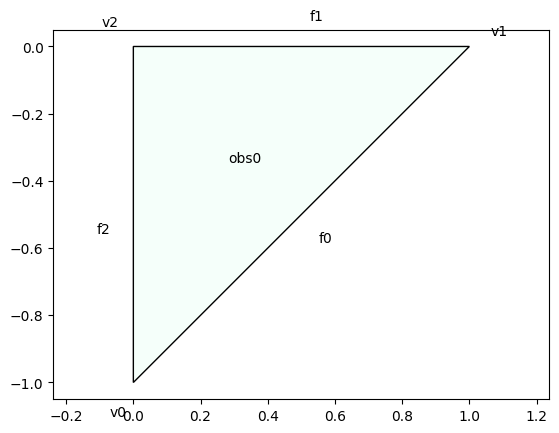

s


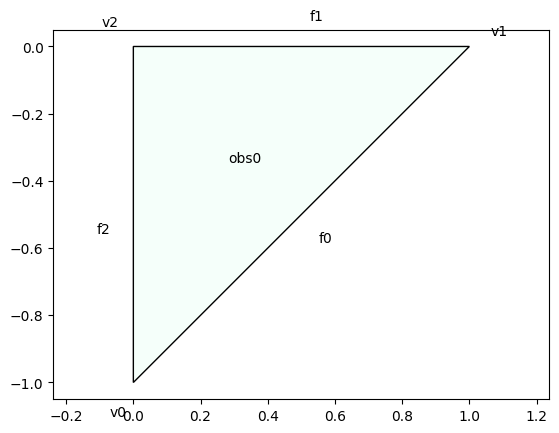

t


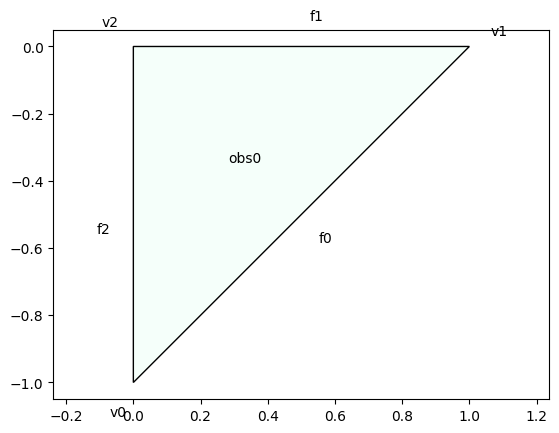

In [12]:
for name in contact_graph.vertex_names:
    print(name)
    contact_graph.plot_samples_in_set(name, 1)
    plt.show()


rob_pos: [-0.13333045 -1.09998453]


False

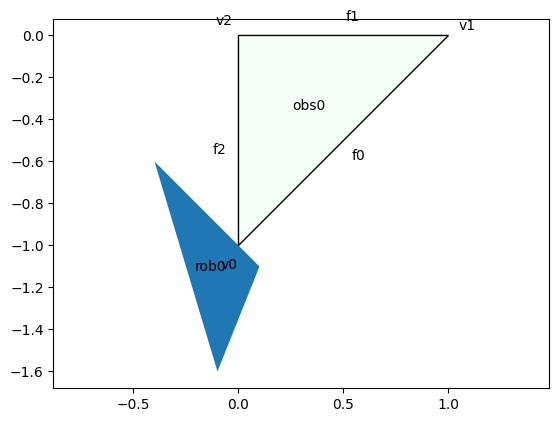

In [13]:
# contact_graph.vertices["('IC:obs0_v0-rob0_f0',)"].plot
contact_graph.plot_samples_in_set("('IC:obs0_v0-rob0_f0',)", 1)
xy=[-0.63333045, -0.59998453]
sample = np.repeat(xy, n_pos_per_set)
# print(sample.shape)
# contact_graph.vertices["('IC:obs0_v0-rob0_f0',)"].convex_set.dim
contact_graph.vertices["('IC:obs0_v0-rob0_f0',)"].convex_set.set.PointInSet(sample)